<a href="https://colab.research.google.com/github/Anudeepsadda/Detection_of_Uterine_Abnormalities_in_PCOD-_Cases/blob/main/SVM_%26_Logistic_Regression_PCOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv("/content/pcod data set.csv")

In [4]:
# Dataset overview
print("Shape of dataset:", df.shape)

Shape of dataset: (68, 15)


In [5]:
print("First 5 rows:\n", df.head())

First 5 rows:
                  Age Current weight 3 months ago weight Profession  \
0  13 years-20 years             55                  55    student   
1  13 years-20 years           63.2                  65    student   
2  13 years-20 years             55                  No    student   
3  13 years-20 years             75                  73    student   
4  13 years-20 years            5.1                  65    student   

  Any sudden weight gain/loss Regular/irregular periods  \
0                          No                   regular   
1                         Yes                   regular   
2                          No                   regular   
3                         Yes                 irregular   
4                         Yes                 irregular   

  Mensutral cycle occurrence Facial hair Acne related problems  \
0            once in a month          No                    No   
1            once in a month          No                   Yes   
2          

In [6]:
# Rename columns for convenience
df.columns = ['Age', 'Current weight', '3 months ago weight', 'Profession',
              'Any sudden weight gain/loss', 'Regular/irregular periods',
              'Mensutral cycle occurrence', 'Facial hair', 'Acne related problems',
              'Exercise/yoga/meditation', 'Sleeping hours',
              'No.of Fruits and vegetables serving/day',
              'No.of junk food servings/day', 'relaxation activities', 'Target class']

In [8]:
df.head()

,Age,Current weight,3 months ago weight,Profession,Any sudden weight gain/loss,Regular/irregular periods,Mensutral cycle occurrence,Facial hair,Acne related problems,Exercise/yoga/meditation,Sleeping hours,No.of Fruits and vegetables serving/day,No.of junk food servings/day,relaxation activities,Target class
0,13 years-20 years,55,55,student,No,regular,once in a month,No,No,never,6-8 hours,Less than 1 serving,Less than 1 serving,Rarely,No
1,13 years-20 years,63.2,65,student,Yes,regular,once in a month,No,Yes,more than 3 times a week,6-8 hours,1-3 servings,1-3 servings a week,Sometimes,Yes
2,13 years-20 years,55,No,student,No,regular,once in a month,No,Yes,never,less than 6 hours,4-6 servings,1-3 servings,Sometimes,No
3,13 years-20 years,75,73,student,Yes,irregular,once in 3 months,No,Yes,never,less than 6 hours,Less than 1 serving,1-3 servings,Sometimes,Yes
4,13 years-20 years,5.1,65,student,Yes,irregular,once in 3 months,No,Yes,once a week,6-8 hours,1-3 servings,1-3 servings a week,Sometimes,Yes


In [9]:
col_names=df.columns

In [10]:
col_names

Index(['Age', 'Current weight', '3 months ago weight', 'Profession',
       'Any sudden weight gain/loss', 'Regular/irregular periods',
       'Mensutral cycle occurrence', 'Facial hair', 'Acne related problems',
       'Exercise/yoga/meditation', 'Sleeping hours',
       'No.of Fruits and vegetables serving/day',
       'No.of junk food servings/day', 'relaxation activities',
       'Target class'],
      dtype='object')

In [11]:
# Target class distribution
print("\nTarget class value counts:")
print(df['Target class'].value_counts())
print("\nTarget class percentage distribution:")
print(df['Target class'].value_counts() / np.float64(len(df)))


Target class value counts:
Target class
No     50
Yes    18
Name: count, dtype: int64

Target class percentage distribution:
Target class
No     0.735294
Yes    0.264706
Name: count, dtype: float64


In [15]:
# Summary and missing values
print("\nDataset info:")
df.info()
print("\nMissing values:")
print(df.isnull().sum())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Age                                      67 non-null     object
 1   Current weight                           67 non-null     object
 2   3 months ago weight                      68 non-null     object
 3   Profession                               68 non-null     object
 4   Any sudden weight gain/loss              67 non-null     object
 5   Regular/irregular periods                68 non-null     object
 6   Mensutral cycle occurrence               67 non-null     object
 7   Facial hair                              68 non-null     object
 8   Acne related problems                    68 non-null     object
 9   Exercise/yoga/meditation                 68 non-null     object
 10  Sleeping hours                           68 non-n

In [17]:
# Fill missing values
df["Age"].fillna("None", inplace=True)
df["Current weight"].fillna("0.0", inplace=True)
df["Any sudden weight gain/loss"].fillna("none", inplace=True)
df["Mensutral cycle occurrence"].fillna("none", inplace=True)

<ipython-input-17-313fd01c6eca>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna("None", inplace=True)
<ipython-input-17-313fd01c6eca>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [18]:
print("\nMissing values after filling:")
print(df.isnull().sum())


Missing values after filling:
Age                                        0
Current weight                             0
3 months ago weight                        0
Profession                                 0
Any sudden weight gain/loss                0
Regular/irregular periods                  0
Mensutral cycle occurrence                 0
Facial hair                                0
Acne related problems                      0
Exercise/yoga/meditation                   0
Sleeping hours                             0
No.of Fruits and vegetables serving/day    0
No.of junk food servings/day               0
relaxation activities                      0
Target class                               0
dtype: int64


In [19]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [20]:
# Splitting features and labels
X = df.drop(['Target class'], axis=1)
Y = df['Target class']

In [21]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=0)

In [22]:
print("\nTrain and test set shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("Y_train:", Y_train.shape, "Y_test:", Y_test.shape)


Train and test set shapes:
X_train: (57, 14) X_test: (11, 14)
Y_train: (57,) Y_test: (11,)


In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

LogisticRegression()

In [25]:
# Predictions
Y_pred = logmodel.predict(X_test)

In [26]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


Confusion Matrix:
 [[8 1]
 [1 1]]


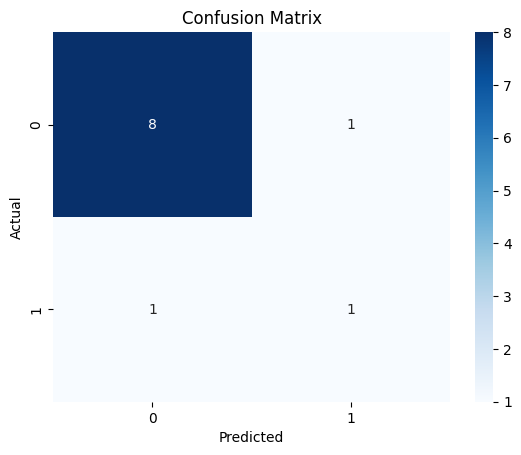

In [27]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.50      0.50      0.50         2

    accuracy                           0.82        11
   macro avg       0.69      0.69      0.69        11
weighted avg       0.82      0.82      0.82        11



In [29]:
# Accuracy
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy Score:", acc)

Accuracy Score: 0.8181818181818182


In [31]:
# GridSearchCV for SVM
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC

svm_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

In [32]:
svm_cv = StratifiedKFold(n_splits=5)
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=svm_cv, scoring='accuracy')
svm_grid.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [33]:
print("\nSVM Best Parameters:", svm_grid.best_params_)
print("SVM Best Accuracy Score:", svm_grid.best_score_)


SVM Best Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
SVM Best Accuracy Score: 0.8757575757575757


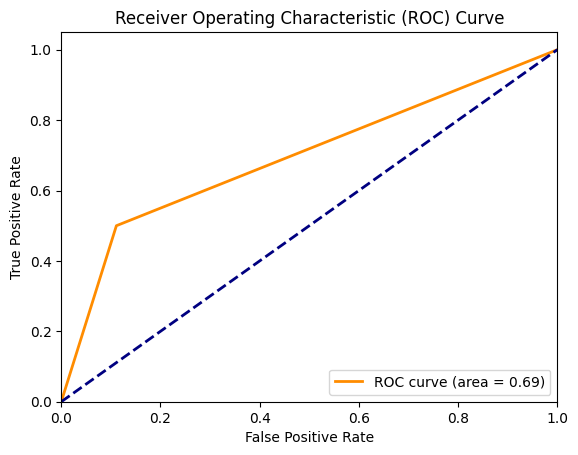

In [35]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [36]:
# Binary Cross-Entropy Loss Function
def compute_loss(Y_true, Y_pred):
    Y_true = np.array(Y_true)
    Y_pred = np.array(Y_pred)
    y_zero_loss = Y_true * np.log(Y_pred + 1e-9)
    y_one_loss = (1 - Y_true) * np.log(1 - Y_pred + 1e-9)
    return -np.mean(y_zero_loss + y_one_loss)

In [37]:
# Convert predictions to float for loss calculation
compute_loss(Y_test, Y_pred)

np.float64(3.7678665149902573)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using the best SVM model
svm_best = svm_grid.best_estimator_
Y_svm_pred = svm_best.predict(X_test)

In [40]:
print('SVM best Parameters:', svm_grid.best_params_)
print('SVM best  Accuracy Score:', svm_grid.best_score_)

SVM best Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
SVM best  Accuracy Score: 0.8757575757575757


SVM Confusion Matrix:
 [[7 2]
 [0 2]]


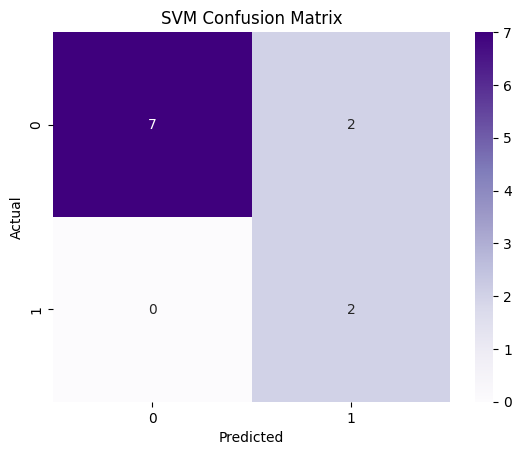

In [41]:
# Confusion matrix
svm_conf_matrix = confusion_matrix(Y_test, Y_svm_pred)
print("SVM Confusion Matrix:\n", svm_conf_matrix)

# Plot the confusion matrix
sns.heatmap(svm_conf_matrix, annot=True, cmap='Purples', fmt='g')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [42]:
# Classification report
print("\nSVM Classification Report:")
print(classification_report(Y_test, Y_svm_pred))


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.50      1.00      0.67         2

    accuracy                           0.82        11
   macro avg       0.75      0.89      0.77        11
weighted avg       0.91      0.82      0.84        11



Real-Time Predictions

In [44]:
# Sample user input (example; replace with real inputs)
user_input = {
    'Age': '25',
    'Current weight': '70',
    '3 months ago weight': '68',
    'Profession': 'Student',
    'Any sudden weight gain/loss': 'Yes',
    'Regular/irregular periods': 'Irregular',
    'Mensutral cycle occurrence': 'Frequent',
    'Facial hair': 'Yes',
    'Acne related problems': 'Yes',
    'Exercise/yoga/meditation': 'No',
    'Sleeping hours': '6',
    'No.of Fruits and vegetables serving/day': '2',
    'No.of junk food servings/day': '3',
    'relaxation activities': 'No'
}

In [45]:
# Convert to DataFrame
user_df = pd.DataFrame([user_input])

In [46]:
# Append to original df to ensure label encoding aligns (temporary operation)
temp_df = pd.concat([df.drop('Target class', axis=1), user_df], ignore_index=True)

In [47]:
# Re-apply label encoding to all columns
for col in temp_df.columns:
    le = LabelEncoder()
    temp_df[col] = le.fit_transform(temp_df[col].astype(str))

In [48]:
# Extract the last row (which is our real-time input)
user_encoded = temp_df.tail(1)

In [49]:
# Scale using the same scaler
user_scaled = scaler.transform(user_encoded)

In [50]:
# Predict using best SVM model
user_prediction = svm_best.predict(user_scaled)

In [51]:
# Output result
if user_prediction[0] == 1:
    print("⚠️ PCOD Symptoms Detected (Class 1)")
else:
    print("✅ No PCOD Symptoms Detected (Class 0)")

✅ No PCOD Symptoms Detected (Class 0)
